In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path to your CSV file in Google Drive
path = '/content/drive/MyDrive/ML/Stocks_ClosePrice.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(path)
df

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


In [6]:
# (a)
return_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']

# 過濾掉缺失值
df_returns = df[return_columns].dropna()

# 計算每隻股票的平均收益和標準差
mean_returns = df_returns.mean()
std_returns = df_returns.std()

df_mean_std = pd.DataFrame({
    'Mean Return': mean_returns,
    'Standard Deviation': std_returns
})

df_mean_std

,Mean Return,Standard Deviation
FB.1,0.000555,0.020943
GOOG.1,0.000189,0.018474
NFLX.1,-0.001250,0.027119
AMZN.1,-0.000302,0.022313
AAPL.1,-0.000056,0.020421


<ipython-input-10-5aec84d087b0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_returns[i], std_returns[i],stock)


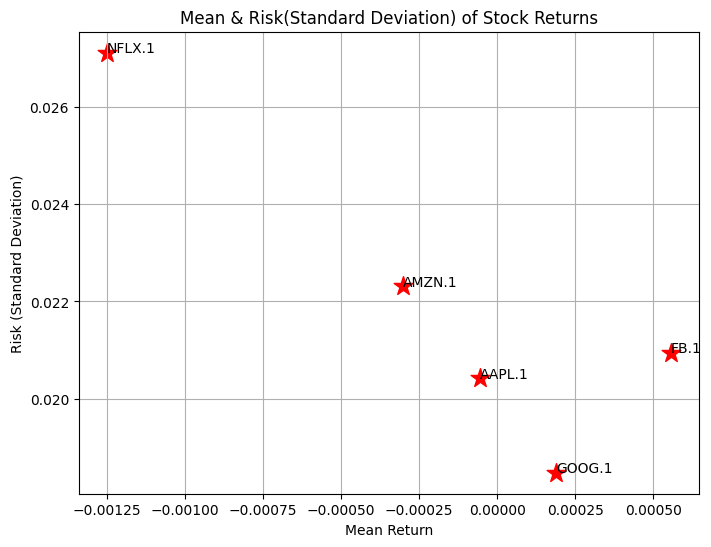

In [10]:
# (b)
# 創建 2D 平面圖
plt.figure(figsize=(8, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200)

# 為每個點標註股票名稱
for i, stock in enumerate(return_columns):
    plt.text(mean_returns[i], std_returns[i],stock)


plt.title('Mean & Risk(Standard Deviation) of Stock Returns')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.grid(True)

# 顯示圖表
plt.show()

In [11]:
# (c)
# Randomly generate weights for the five stocks that sum to 1
weights = np.random.random(len(return_columns))
weights /= np.sum(weights)

# Calculate portfolio mean and standard deviation
portfolio_mean = np.dot(weights, mean_returns)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(df_returns.cov(), weights)))

# Display the results
print("Random Weights:", weights)
print("Portfolio Mean Return:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)

Random Weights: [0.33169735 0.2044599  0.05486344 0.29836618 0.11061312]
Portfolio Mean Return: 5.785671222368459e-05
Portfolio Standard Deviation: 0.01829692358433726


<ipython-input-20-16202c7327a5>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_returns[i], std_returns[i],stock)


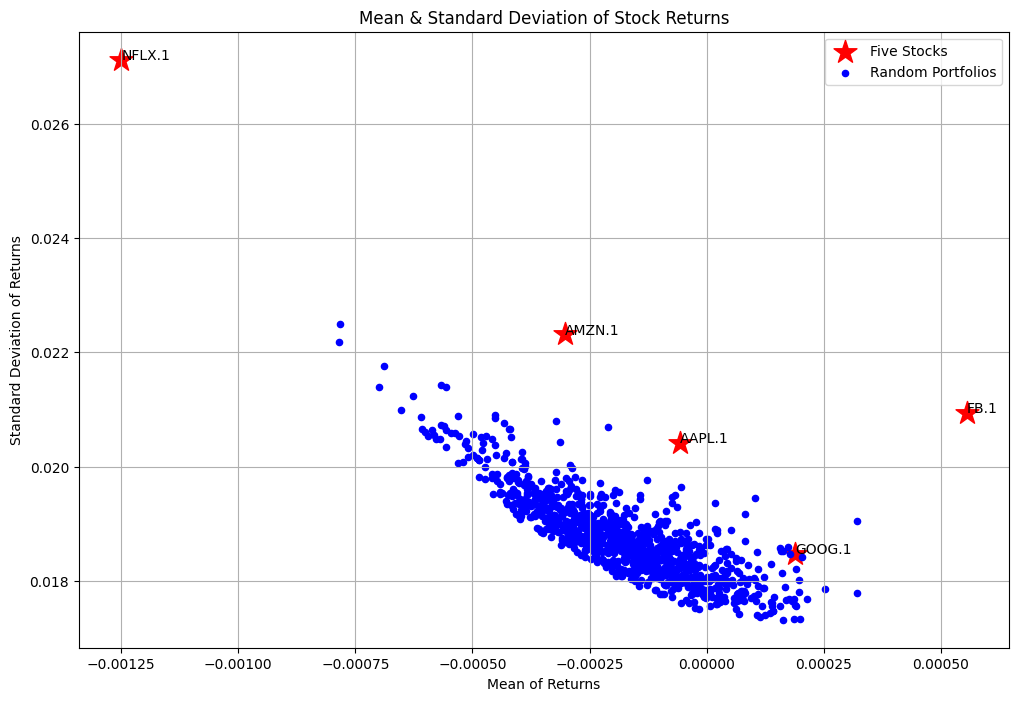

In [20]:
# (d)
portfolio_means = []
portfolio_stds = []

for _ in range(1000):
  # Generate random weights
  weights = np.random.rand(len(return_columns))
  weights /= np.sum(weights)

  # Calculate portfolio mean and standard deviation
  portfolio_mean = np.dot(weights, mean_returns)
  portfolio_std = np.sqrt(np.dot(weights.T, np.dot(df_returns.cov(), weights)))

  portfolio_means.append(portfolio_mean)
  portfolio_stds.append(portfolio_std)

# Plot the mean and standard deviation of the portfolios
plt.figure(figsize=(12, 8))
plt.scatter(mean_returns, std_returns, marker='*', color='red',
            s=300, label='Five Stocks')
plt.scatter(portfolio_means, portfolio_stds, marker='o', color='blue',
            s=20, label='Random Portfolios')

# 為每個點標註股票名稱
for i, stock in enumerate(return_columns):
    plt.text(mean_returns[i], std_returns[i],stock)

plt.title('Mean & Standard Deviation of Stock Returns')
plt.xlabel('Mean of Returns')
plt.ylabel('Standard Deviation of Returns')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-25-e257e061003f>:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mean_returns[i], std_returns[i],stock)


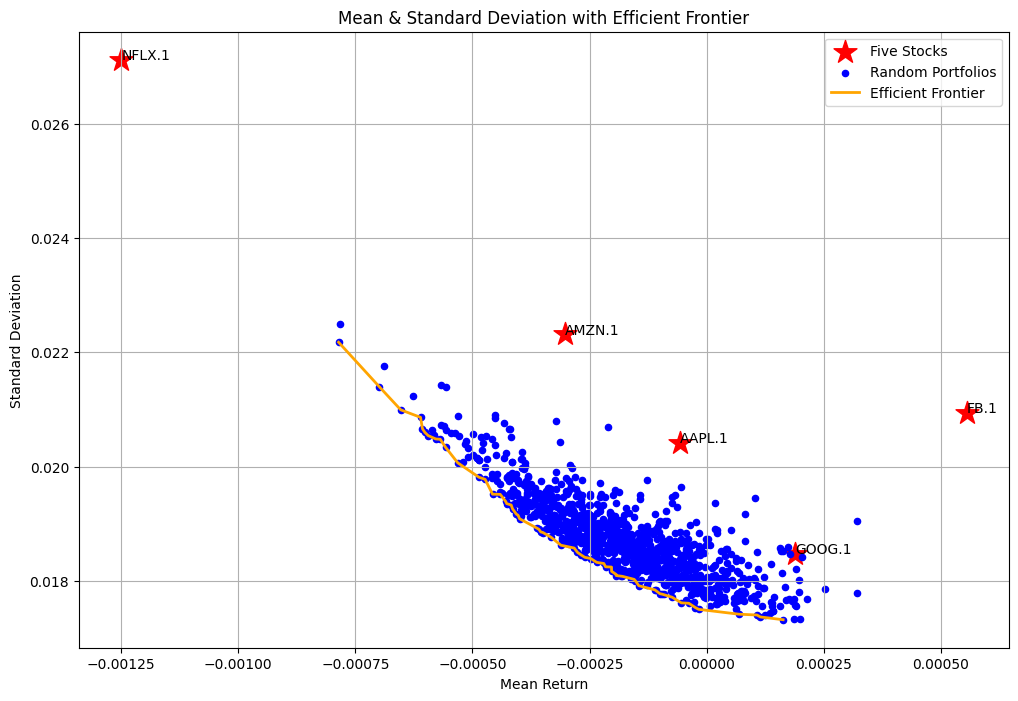

In [25]:
# (e)
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Sort portfolios by mean return and find the minimum std for each unique mean return
sorted_indices = np.argsort(portfolio_means)
sorted_means = portfolio_means[sorted_indices]
sorted_stds = portfolio_stds[sorted_indices]

# Calculate the efficiency frontier by filtering portfolios with minimum std for a given mean return
efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])

# Plot the efficient frontier
plt.figure(figsize=(12, 8))
plt.scatter(mean_returns, std_returns, marker='*', color='red',
            s=300, label='Five Stocks')
plt.scatter(portfolio_means, portfolio_stds, marker='o', color='blue',
            s=20, label='Random Portfolios')
plt.plot(efficient_frontier_means, efficient_frontier_stds, color='orange',
         linewidth=2, label='Efficient Frontier')

# 為每個點標註股票名稱
for i, stock in enumerate(return_columns):
    plt.text(mean_returns[i], std_returns[i],stock)


plt.title('Mean & Standard Deviation with Efficient Frontier')
plt.xlabel('Mean Return')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

(f)

Yes, the envelope line (efficient frontier) represents the best possible set of portfolios in terms of risk and return.